### Assignment 1 - Exploratory Data Analysis (EDA) for Heart Failure Clinical Records Dataset

### Step 0: Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

plt.style.use('ggplot') # Use stylesheet for plots
#pd.set_option('max_columns', 200)

%matplotlib inline

### Step 1: Reading Data and Data Understanding
- Read/Load Dataset

- Check Memory usage of the dataset. If large dataset, do the steps below as needed
    - Reduce the memory by removing unnecessary features/observations for the analysis
    - Reduce the memory by changing the datatype of the columns, float64->float16, int64->int16, object->category
    - Load dataset in chunks

- Check for basic information of the dataset
    - Check the number of observations and features of the Dataset
    - Top and bottom observations to understand the pattern
    - List the datatypes of the features

- Check for basic statistical information of the dataset

In [4]:
# Load/Read dataset
heart_failure_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
# Check memory usage
heart_failure_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Check the number of features and observations of the dataset
print(f"Number of observations: {heart_failure_df.shape[0]} \nNumber of features: {heart_failure_df.shape[1]} \n****************************")

Number of observations: 299 
Number of features: 13 
****************************


In [8]:
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
heart_failure_df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [10]:
heart_failure_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
# Check for basic statistical information of numberic features
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
# Check for basic statistical information of categorical features
#print(heart_failure_df.describe(include='object')

### Step 2: Data Preparation
- Drop irrelevant features and observations
- Identify and drop duplicate features and observations
- Replace features(columns) values with appropriate values
- Hanlde Missing Data

In [13]:
# Identify duplicate observations(rows)
duplicates = heart_failure_df[heart_failure_df.duplicated()]

if (len(duplicates) == 0):
    print("NOTE: There are no duplicate observations.")
else:
    print("Duplicate observations: \n")

NOTE: There are no duplicate observations.


In [14]:
# Check for null values
heart_failure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Step 3: Feature Understanding and Feature Relations
- Feature (Univariate) Analysis
    - Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot
- Feature Relations
    - Bivariate Analysis
        - Scatterplot
        - Pairplot
        - Groupby Comparisons
    - Multivariate Analysis
        - Heatmap Correlation

## Step 5: Ask a question about the data

1. What is the distribution of age among heart failure patients in the dataset?
2. How does the death rate vary with age?
3. What is the is the percentage of male and female patients in the dataset?
4. How does the platelet count vary among different age groups?
5. Is there a correlation between creatinine and sodium levels in the blood?
6. How does the prevalence of high blood pressure differ between male and female patients?
7. What is the relationship between smoking habits and the occurrence of heart failure?
8. Are there any noticeable patterns in the distribution of death events across different age groups?
9. Is there any significant difference in ejection fraction between patients with and without diabetes?
10. How does the serum creatinine level vary between patients who survived and those who did not?

#### 1. What is the distribution of age among heart failure patients in the dataset?

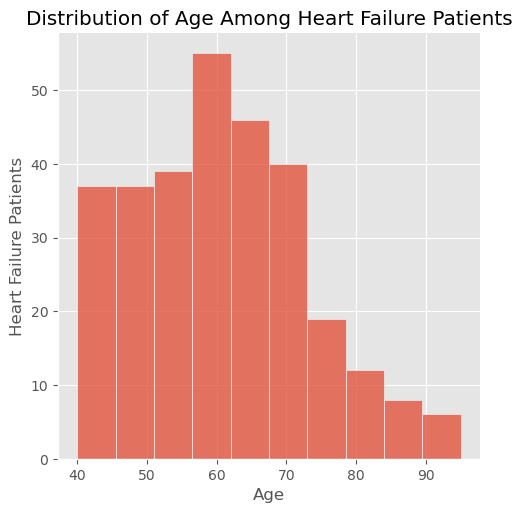

In [15]:
sns.displot(data=heart_failure_df, x='age').set(title='Distribution of Age Among Heart Failure Patients', xlabel='Age', ylabel='Heart Failure Patients')
plt.show()

#### 2. How does the death rate vary with age?

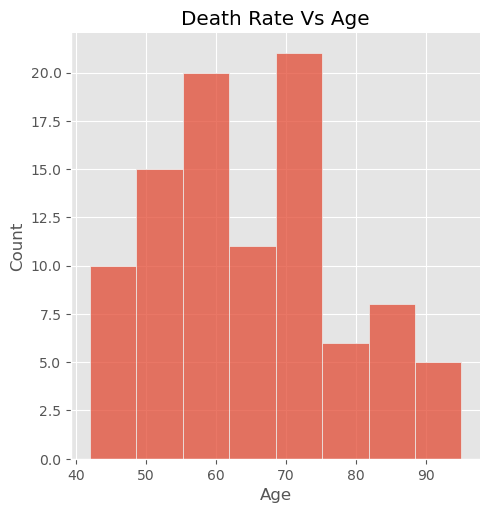

In [16]:
death_events = heart_failure_df[heart_failure_df['DEATH_EVENT'] == 1]

#death_events['age'].value_counts()

sns.displot(data=death_events, x='age').set(title='Death Rate Vs Age', xlabel='Age')
plt.show()

#### 3. What is the percentage of male and female patients in the dataset?

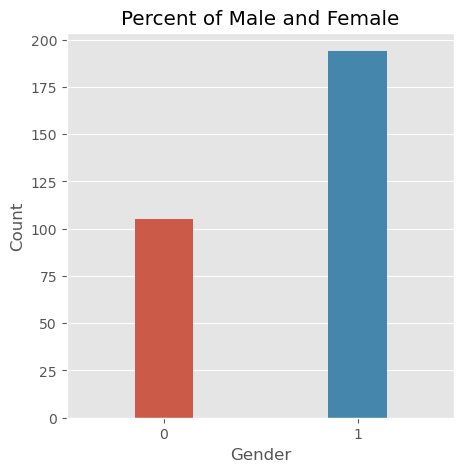

In [21]:
heart_failure_df['sex'].value_counts()

plt.figure(figsize=(5,5))
#sns.countplot(data=heart_failure_df, x='sex', width=0.3, stat='percent').set(title='Percent of Male and Female', xlabel='Gender', ylabel='Percentage')
sns.countplot(heart_failure_df, x='sex', width=0.3).set(title='Percent of Male and Female', xlabel='Gender', ylabel='Count')
plt.show()

<Axes: ylabel='count'>

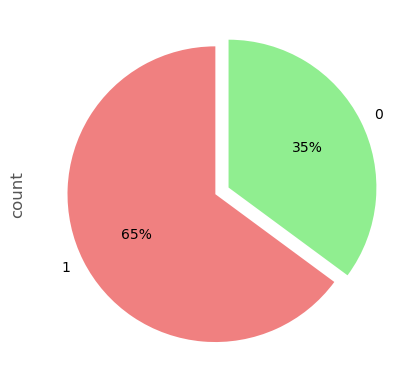

In [55]:
heart_failure_df['sex'].value_counts().plot.pie(autopct='%1.0f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90)

#### 4. How does the platelet count vary among different age groups?

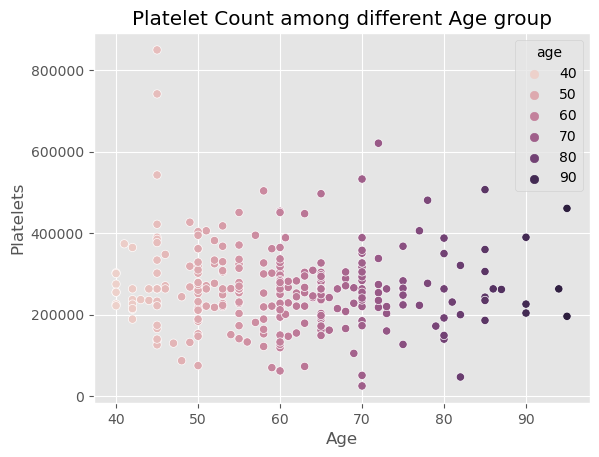

In [24]:
#min_age, max_age = heart_failure_df['age'].min(), heart_failure_df['age'].max()

sns.scatterplot(heart_failure_df, x='age', y='platelets', hue='age').set(title='Platelet Count among different Age group', xlabel='Age', ylabel='Platelets')
plt.show()


#### 5. Is there a correlation between creatinine and sodium levels in the blood?

In [25]:
heart_failure_df['serum_creatinine'].corr(method='pearson', other=heart_failure_df['serum_sodium'])

-0.18909521009117386

#### 6. How does the prevalence of high blood pressure differ between male and female patients

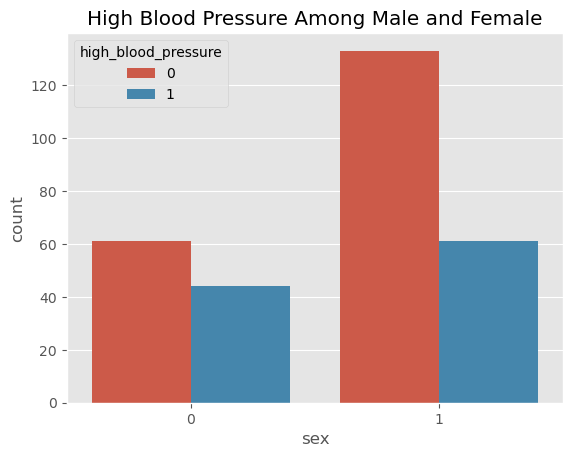

In [238]:
#heart_failure_df['high_blood_pressure'].value_counts()
#high_blood_pressure
#0    194
#1    105

sns.countplot(heart_failure_df, x=heart_failure_df['sex'], hue='high_blood_pressure').set(title='High Blood Pressure Among Male and Female')
plt.show()

#### 7. What is the relationship between smoking habits and the occurrence of heart failure?

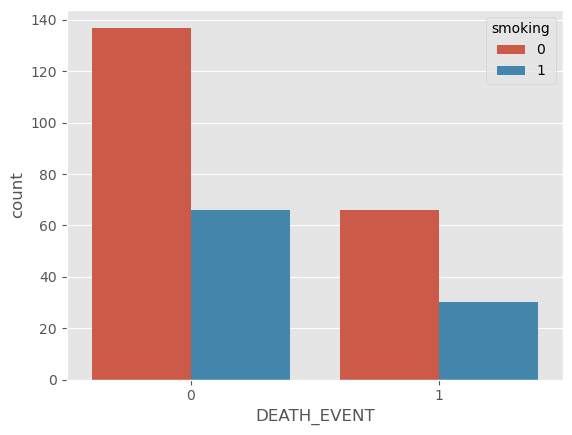

In [27]:
sns.countplot(heart_failure_df, x='DEATH_EVENT', hue='smoking')
plt.show()

#### 8. Are there any noticeable patterns in the distribution of death events across different age groups?

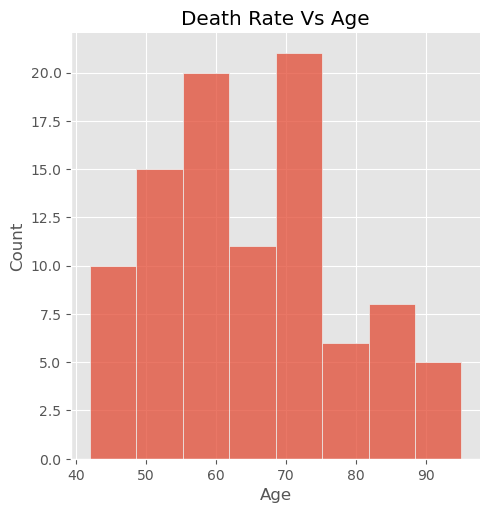

In [28]:
death_events = heart_failure_df[heart_failure_df['DEATH_EVENT'] == 1]

sns.displot(data=death_events, x='age').set(title='Death Rate Vs Age', xlabel='Age')
plt.show()

In [268]:
heart_failure_df[heart_failure_df['DEATH_EVENT'] == 1].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417,1.0
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946,62.378281,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,1.0
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000,25.500000,1.0
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000,44.500000,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000,102.250000,1.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.0


In [29]:
heart_failure_df[(heart_failure_df['DEATH_EVENT'] == 1) & (heart_failure_df['age'] > 75)].__len__()

19

##### ************* Noticeable patterns in the distribution of death events among different age groups
- Average age of the patients with death events is around 65 years
- Most of the death events occured between the age 40 and 75 years
- Maximum numer of death events occured between 70 - 75 and 55 - 60 years of age
- There are around 20% death events occured between 75 and 95 years of age

#### 9. Is there any significant difference in ejection fraction between patients with and without diabetes?

In [30]:
heart_failure_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

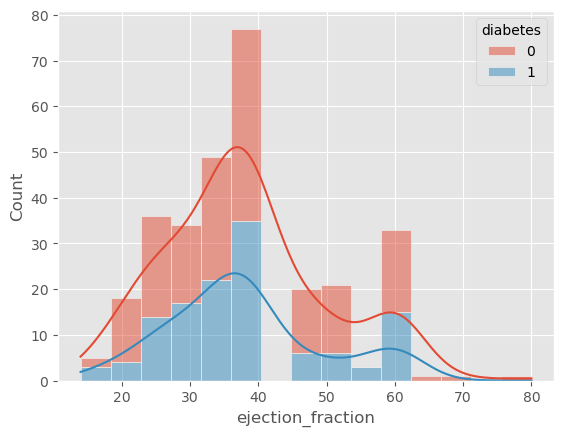

In [61]:
sns.histplot(heart_failure_df, x='ejection_fraction', hue='diabetes', kde=True, multiple='stack')
plt.show()

#### 10. How does the serum creatinine level vary between patients who survived and those who did not?

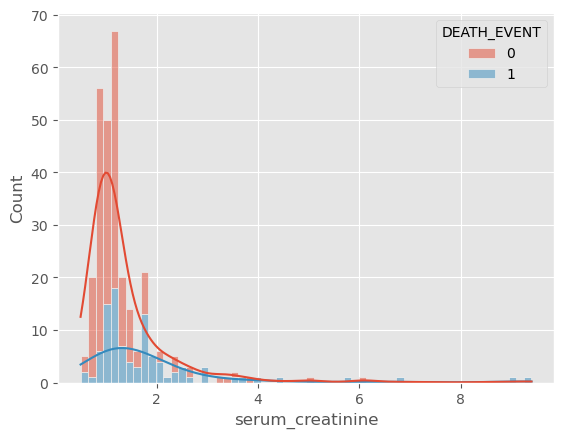

In [59]:
sns.histplot(heart_failure_df, x='serum_creatinine', hue='DEATH_EVENT', kde=True, multiple='stack')
plt.show()